1. 학습(Train) 데이터셋 (113842개)  
ID : 신용 카드 거래 ID  
Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature

2. 검증(Validation) 데이터셋 (28462개)    
  ID : 신용 카드 거래 ID  
Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature  
Class : 신용 카드 거래의 정상, 사기 여부 (정상 : 0, 사기 : 1)

3. 테스트(Test) 데이터셋 (142503개)  
ID : 신용 카드 거래 ID  
Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature


# Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [2]:
train= pd.read_csv('./Data/train.csv') # Train
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [3]:
val= pd.read_csv('./Data/val.csv') # Validation
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


# 결측치 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

# train/validation 분포 확인

In [5]:
train.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


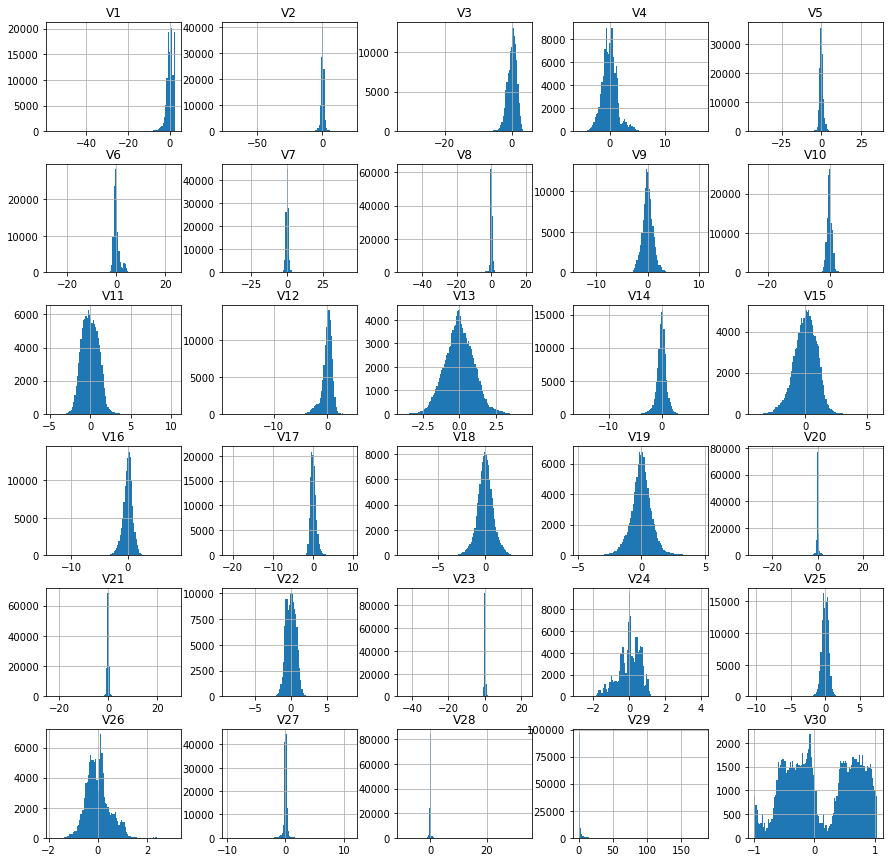

In [6]:
train.drop(columns=['ID']).hist(bins = 100, figsize = (15,15))
plt.show()

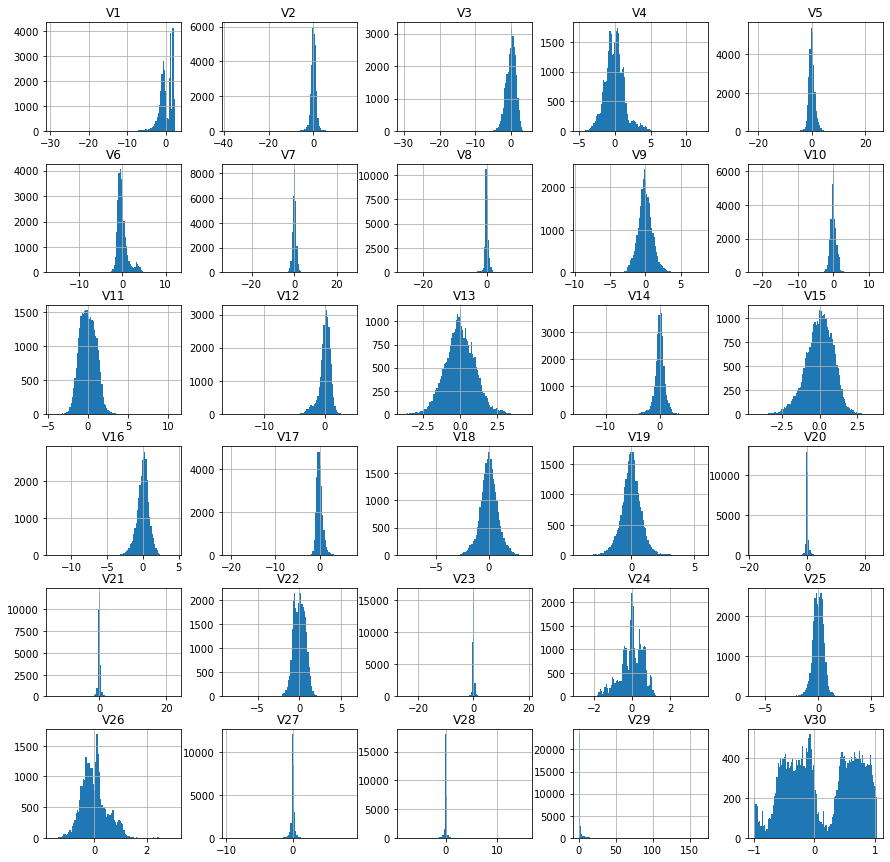

In [7]:
val.drop(columns=['ID', 'Class']).hist(bins = 100, figsize = (15,15))
plt.show()

# Validation set 사기 거래 비율  
* Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [8]:
val_normal, val_fraud = val['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


# Model Define & Fit

`Isolation forest`는 기본적으로 데이터셋을 의사결정나무(Decision Tree) 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 의사결정나무 상단부에서 분리할 수 있다는 것을 이용한다.  
이 특성을 사용해 의사결정나무를 몇 회 타고 내려가야 분리되는가를 기준으로 정상과 이상을 분리한다.
- Isolation forest의 장점  
  군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적다  
  강건한(Robust)한 모델을 만들 수 있다

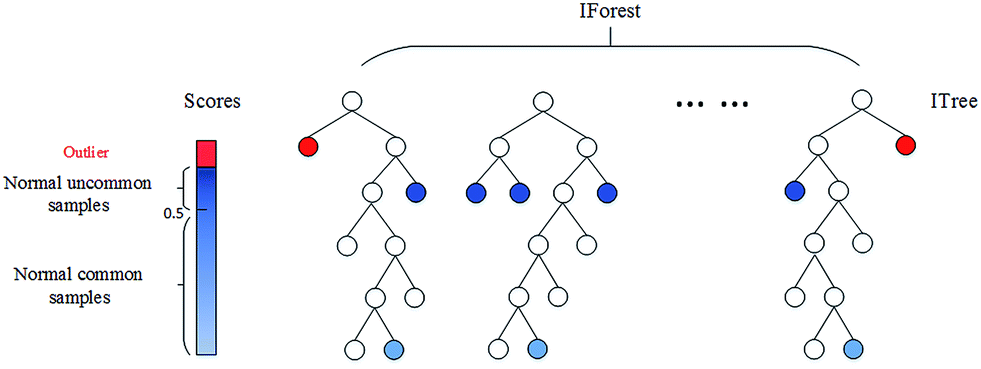

|parameters|description|  
|---|---|  
|n_estimators|나무의 개수,디폴트:100 |  
|max_samples|지정한 개수 만큼 나무별로 데이터를 샘플링|  
|contamination|전체 데이터에서 이상치 비율|  
|max_features|각 나무를 훈련할 때, 사용할 feature의 개수, 디폴트:1|  

In [11]:
train_x = train.drop(columns=['ID']) # Input Data

In [10]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. 
#verbose=0 이라서 과정이 안 보임
model = IsolationForest(n_estimators=1000, max_samples=len(train_x), contamination=val_contamination, random_state=42, verbose=0)
model.fit(train_x)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=1000, random_state=42)

`one class svm`은 특정 클래스의 테스트 샘플을 다른 클래스와 구별하는 능력을 학습하는 비지도 학습 기법

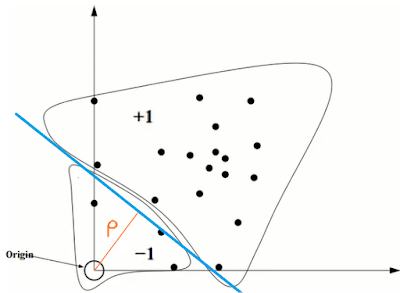

In [11]:
oc_svm_clf = svm.OneClassSVM(gamma=0.00000001, kernel='rbf', nu=val_contamination,verbose=False) 
oc_svm_clf.fit(train_x)

OneClassSVM(gamma=1e-08, nu=0.0010551491277433877)

`Local Outlier Factor(LOF)`는 각 점들의 밀도와 이웃점들의 밀도를 고려하여 해당 점의 스코어를 계산

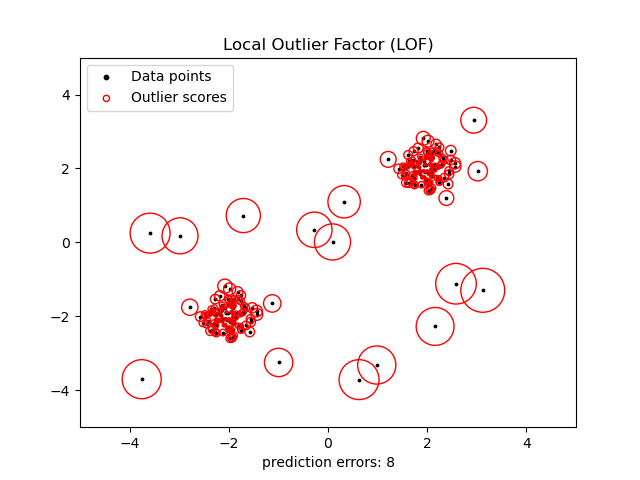

훈련데이터가 아웃라이어에 오염되지 않았다면, 새로운 관찰값이 아웃라이어인지 여부
이런 경우의 아웃라이어를 노블티라고 부른다.

In [25]:
lof = LocalOutlierFactor(n_neighbors=80, contamination=val_contamination,novelty=True)
lof.fit(train_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=80,
                   novelty=True)

`EllipticEnvelope`은 정규 분포를 이용하여 데이터 분포에 타원을 그립니다. 타원에서 벗어날수록 outlier입니다.

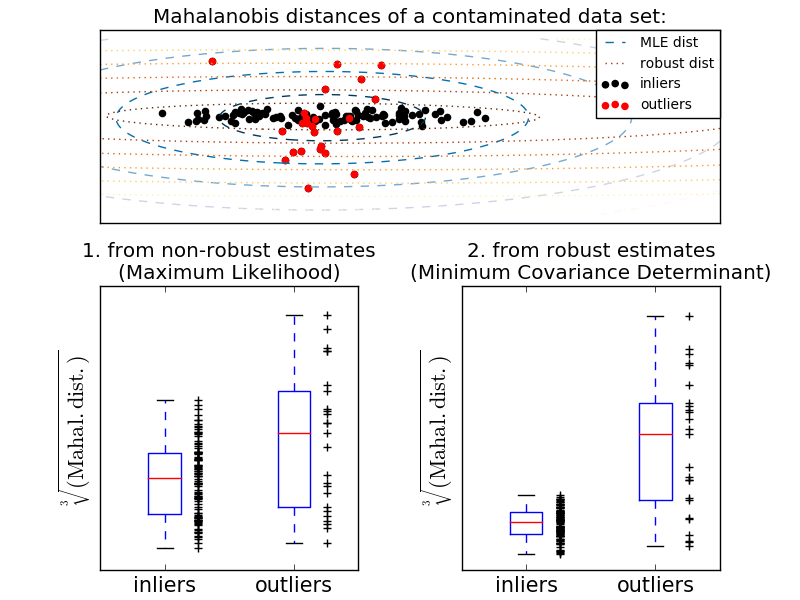

In [26]:
Ell= EllipticEnvelope(support_fraction=0.218,contamination = val_contamination, random_state = 42)
Ell.fit(train_x)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.218)

# Evaluation : Validation set

In [14]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [15]:
val_x = val.drop(columns=['ID', 'Class']) # Input Data
val_y = val['Class'] # Label

In [15]:
val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.6963959681062595]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.39      0.40      0.39        30

    accuracy                           1.00     28462
   macro avg       0.69      0.70      0.70     28462
weighted avg       1.00      1.00      1.00     28462



In [16]:
oc_svm_pred = oc_svm_clf.predict(val_x)
oc_svm_pred= get_pred_label(oc_svm_pred)
oc_svm_score = f1_score(val_y, oc_svm_pred, average='macro')
print(f'Validation F1 Score : [{oc_svm_score}]')
print(classification_report(val_y, oc_svm_pred))

Validation F1 Score : [0.7072746231706779]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.48      0.37      0.42        30

    accuracy                           1.00     28462
   macro avg       0.74      0.68      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [27]:
lof_pred = lof.predict(val_x)
lof_pred= get_pred_label(lof_pred)
lof_score = f1_score(val_y, lof_pred, average='macro')
print(f'Validation F1 Score : [{lof_score}]')
print(classification_report(val_y, lof_pred))

Validation F1 Score : [0.538039538180205]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.09      0.07      0.08        30

    accuracy                           1.00     28462
   macro avg       0.54      0.53      0.54     28462
weighted avg       1.00      1.00      1.00     28462



In [28]:
Ell_pred = Ell.predict(val_x)
Ell_pred= get_pred_label(Ell_pred)
Ell_score = f1_score(val_y, Ell_pred, average='macro')
print(f'Validation F1 Score : [{Ell_score}]')
print(classification_report(val_y, Ell_pred))

Validation F1 Score : [0.8927516353661109]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.73      0.79        30

    accuracy                           1.00     28462
   macro avg       0.92      0.87      0.89     28462
weighted avg       1.00      1.00      1.00     28462



# Inference : Test set

In [18]:
test= pd.read_csv('./Data/test.csv') 
test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [19]:
test_x = test.drop(columns=['ID'])

In [21]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

In [22]:
test_svm_pred = oc_svm_clf.predict(test_x) # model prediction
test_svm_pred = get_pred_label(test_svm_pred)

In [29]:
test_lof_pred = lof.predict(test_x) # model prediction
test_lof_pred = get_pred_label(test_lof_pred)

In [30]:
test_Ell_pred = Ell.predict(test_x) # model prediction
test_Ell_pred = get_pred_label(test_Ell_pred)

# Submission

In [22]:
submit = pd.read_csv('./Data/sample_submission.csv')
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [30]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)

In [31]:
submit['Class'] = test_svm_pred
submit.to_csv('./submit_svm.csv', index=False)

In [31]:
submit['Class'] = test_lof_pred
submit.to_csv('./submit_lof.csv', index=False)

In [32]:
submit['Class'] = test_Ell_pred
submit.to_csv('./submit_Ell.csv', index=False)

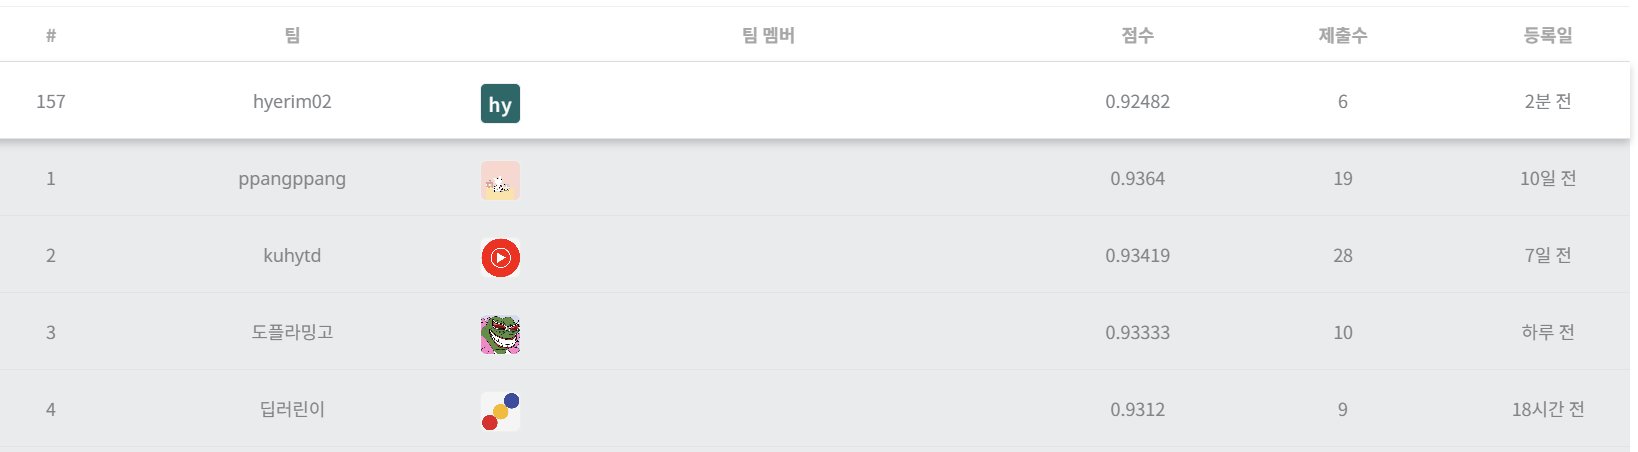

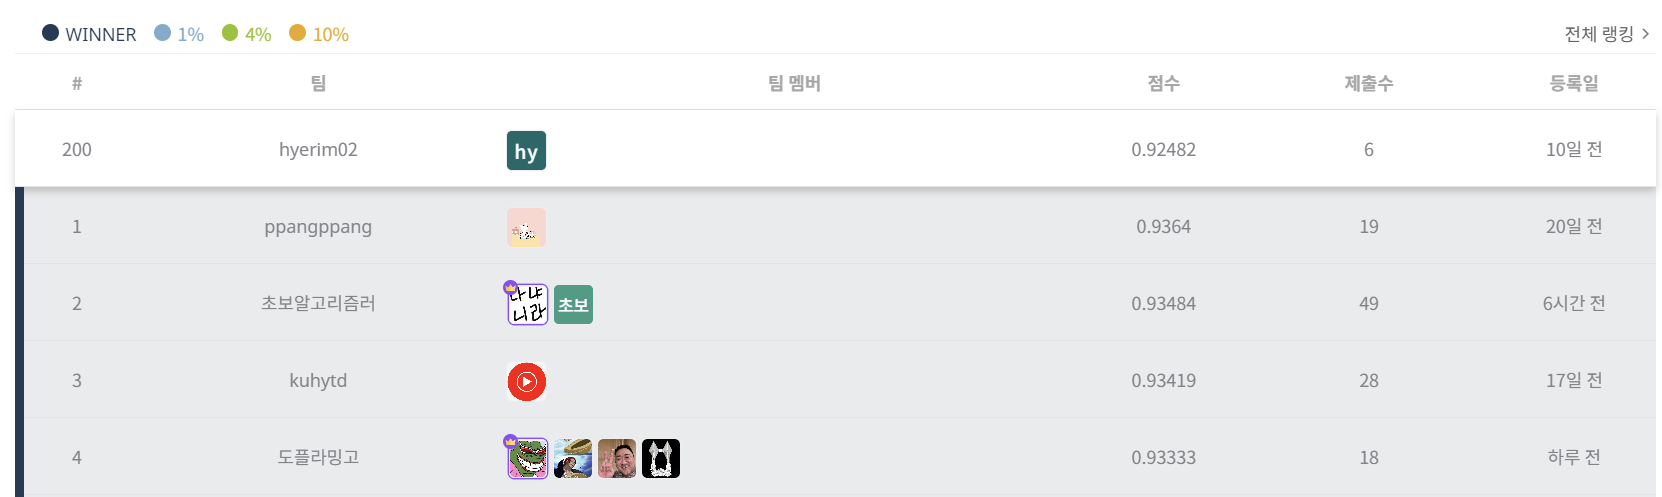  
최종 결과..!!!